## Home Task: Implement K-means algorithm

### Data

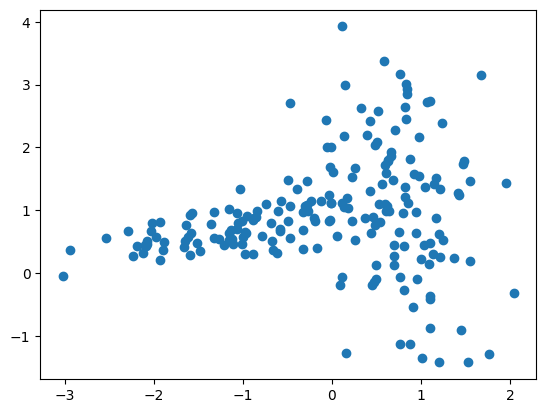

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

###  Steps of implementatiion


1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

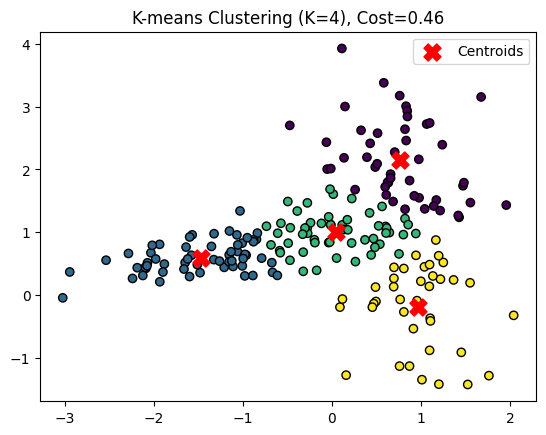

In [5]:
import numpy as np

def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

def assign_to_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def compute_centroids(X, clusters, k):
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def compute_cost(X, centroids, clusters):
    distances = np.linalg.norm(X - centroids[clusters], axis=1)
    return np.sum(distances**2) / len(X)

def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        clusters = assign_to_clusters(X, centroids)
        centroids = compute_centroids(X, clusters, k)

    cost = compute_cost(X, centroids, clusters)
    return clusters, centroids, cost

def run_k_means_multiple_times(X, k, num_iterations=100):
    best_clusters, best_centroids, best_cost = None, None, float('inf')

    for _ in range(num_iterations):
        clusters, centroids, cost = k_means(X, k)
        if cost < best_cost:
            best_clusters, best_centroids, best_cost = clusters.copy(), centroids.copy(), cost

    return best_clusters, best_centroids, best_cost

k = 4
best_clusters, best_centroids, best_cost = run_k_means_multiple_times(Xc_2, k)

plt.scatter(Xc_2[:, 0], Xc_2[:, 1], c=best_clusters, cmap='viridis', edgecolor='k')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='X', s=150, label='Centroids')
plt.title(f'K-means Clustering (K={k}), Cost={best_cost:.2f}')
plt.legend()
plt.show()